In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
files = os.listdir('D:/downloads/dogs-vs-cats/train/')
categories=[]

for file in files:
    category=file.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

In [4]:
df = pd.DataFrame({
    'filename': files,
    'category': categories
})

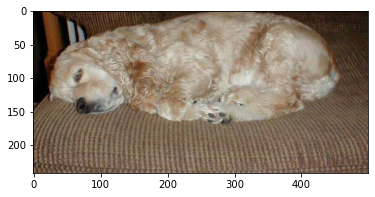

In [5]:
sample = random.choice(files)
image = load_img('D:/downloads/dogs-vs-cats/train/'+sample)
plt.imshow(image)

# 다른 코드 잠시

In [6]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

57344/57026 [==============================] - 0s 3us/step
(404, 13) (102, 13) (404,) (102,)


relu를 쓰는 이유 , 기울기 손실 문제???

페이스북에서 개발한 가중치 초기화 도구

In [10]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


In [3]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [9]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [12]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
434/434 [==============================] - 1s 3ms/step - loss: 2.5151 - accuracy: 0.0978 - val_loss: 2.3986 - val_accuracy: 0.0995
Epoch 2/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3565 - accuracy: 0.0978 - val_loss: 2.3290 - val_accuracy: 0.0995
Epoch 3/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3151 - accuracy: 0.0978 - val_loss: 2.3069 - val_accuracy: 0.1000
Epoch 4/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3016 - accuracy: 0.0961 - val_loss: 2.2997 - val_accuracy: 0.0941
Epoch 5/100
434/434 [==============================] - 1s 3ms/step - loss: 2.2970 - accuracy: 0.1082 - val_loss: 2.2969 - val_accuracy: 0.0985
Epoch 6/100
434/434 [==============================] - 1s 3ms/step - loss: 2.2949 - accuracy: 0.1126 - val_loss: 2.2955 - val_accuracy: 0.1120
Epoch 7/100
434/434 [==============================] - 1s 2ms/step - loss: 2.2936 - accuracy: 0.1144 - val_loss: 2.2944 - val_accuracy: 0.1118

Epoch 58/100
434/434 [==============================] - 1s 2ms/step - loss: 2.2109 - accuracy: 0.3701 - val_loss: 2.2113 - val_accuracy: 0.3704
Epoch 59/100
434/434 [==============================] - 1s 3ms/step - loss: 2.2076 - accuracy: 0.3755 - val_loss: 2.2081 - val_accuracy: 0.3906
Epoch 60/100
434/434 [==============================] - 1s 3ms/step - loss: 2.2043 - accuracy: 0.3716 - val_loss: 2.2047 - val_accuracy: 0.4271
Epoch 61/100
434/434 [==============================] - 1s 2ms/step - loss: 2.2008 - accuracy: 0.4403 - val_loss: 2.2012 - val_accuracy: 0.4163
Epoch 62/100
434/434 [==============================] - 1s 2ms/step - loss: 2.1971 - accuracy: 0.4250 - val_loss: 2.1975 - val_accuracy: 0.4234
Epoch 63/100
434/434 [==============================] - 1s 3ms/step - loss: 2.1935 - accuracy: 0.4288 - val_loss: 2.1940 - val_accuracy: 0.4386
Epoch 64/100
434/434 [==============================] - 1s 3ms/step - loss: 2.1897 - accuracy: 0.4540 - val_loss: 2.1902 - val_accuracy:

In [13]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.8962 - accuracy: 0.5710
Test accuracy:  0.5709999799728394


activation funciton 을 바꾸면?

In [14]:
def mlp_model2():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [15]:
model = mlp_model2()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/100
434/434 [==============================] - 2s 5ms/step - loss: 5.4823 - accuracy: 0.3642 - val_loss: 1.5066 - val_accuracy: 0.4879
Epoch 2/100
434/434 [==============================] - 1s 3ms/step - loss: 1.3467 - accuracy: 0.5298 - val_loss: 1.4314 - val_accuracy: 0.5000
Epoch 3/100
434/434 [==============================] - 1s 3ms/step - loss: 1.1641 - accuracy: 0.5848 - val_loss: 1.1208 - val_accuracy: 0.6116
Epoch 4/100
434/434 [==============================] - 2s 4ms/step - loss: 0.9882 - accuracy: 0.6669 - val_loss: 0.9665 - val_accuracy: 0.6571
Epoch 5/100
434/434 [==============================] - 2s 4ms/step - loss: 0.8034 - accuracy: 0.7483 - val_loss: 0.8107 - val_accuracy: 0.7589
Epoch 6/100
434/434 [==============================] - 2s 4ms/step - loss: 0.6944 - accuracy: 0.7790 - val_loss: 0.7230 - val_accuracy: 0.7596
Epoch 7/100
434/434 [==============================] - 1s 3ms/step - loss: 0.6279 - accuracy: 0.8056 - val_loss: 0.6404 - val_accuracy: 0.8012

Epoch 58/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2294 - accuracy: 0.9301 - val_loss: 0.4867 - val_accuracy: 0.8798
Epoch 59/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2257 - accuracy: 0.9310 - val_loss: 0.5346 - val_accuracy: 0.8687
Epoch 60/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2287 - accuracy: 0.9295 - val_loss: 0.4463 - val_accuracy: 0.8875
Epoch 61/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2221 - accuracy: 0.9325 - val_loss: 0.4535 - val_accuracy: 0.8880
Epoch 62/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2225 - accuracy: 0.9319 - val_loss: 0.4537 - val_accuracy: 0.8899
Epoch 63/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2207 - accuracy: 0.9328 - val_loss: 0.5016 - val_accuracy: 0.8838
Epoch 64/100
434/434 [==============================] - 1s 3ms/step - loss: 0.2200 - accuracy: 0.9322 - val_loss: 0.5075 - val_accuracy:

optimizer 를 바꾸면?

In [16]:
def mlp_model3():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [17]:
model = mlp_model3()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/100
434/434 [==============================] - 2s 5ms/step - loss: 5.1394 - accuracy: 0.6104 - val_loss: 1.2762 - val_accuracy: 0.6816
Epoch 2/100
434/434 [==============================] - 2s 4ms/step - loss: 0.8694 - accuracy: 0.7646 - val_loss: 0.7980 - val_accuracy: 0.7852
Epoch 3/100
434/434 [==============================] - 2s 4ms/step - loss: 0.6097 - accuracy: 0.8306 - val_loss: 0.6196 - val_accuracy: 0.8333
Epoch 4/100
434/434 [==============================] - 2s 4ms/step - loss: 0.4815 - accuracy: 0.8607 - val_loss: 0.5638 - val_accuracy: 0.8571
Epoch 5/100
434/434 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8835 - val_loss: 0.4577 - val_accuracy: 0.8778
Epoch 6/100
434/434 [==============================] - 1s 3ms/step - loss: 0.3865 - accuracy: 0.8910 - val_loss: 0.4521 - val_accuracy: 0.8785
Epoch 7/100
434/434 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.9021 - val_loss: 0.4211 - val_accuracy: 0.8889

Epoch 55/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0349 - accuracy: 0.9905 - val_loss: 0.4276 - val_accuracy: 0.9407
Epoch 56/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0412 - accuracy: 0.9887 - val_loss: 0.4113 - val_accuracy: 0.9433
Epoch 57/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0534 - accuracy: 0.9854 - val_loss: 0.3650 - val_accuracy: 0.9429
Epoch 58/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.4372 - val_accuracy: 0.9406
Epoch 59/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0425 - accuracy: 0.9881 - val_loss: 0.3973 - val_accuracy: 0.9438
Epoch 60/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9885 - val_loss: 0.4365 - val_accuracy: 0.9409
Epoch 61/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0414 - accuracy: 0.9876 - val_loss: 0.4235 - val_accuracy:

In [5]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [6]:
def mlp_model6():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(BatchNormalization)
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization)
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization)
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization)
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [8]:
model1=KerasClassifier(build_fn=mlp_model6,epochs=100,verbose=1)
model2=KerasClassifier(build_fn=mlp_model6,epochs=100,verbose=1)
model3=KerasClassifier(build_fn=mlp_model6,epochs=100,verbose=1)

In [9]:
ens_clf = VotingClassifier(estimators=[('model1',model1),('model1',model1),
                                       ('model1',model1)],voting='soft')

In [13]:
ens_clf.fit(X_train,y_train)

NotImplementedError: Multilabel and multi-output classification is not supported.

In [14]:
from keras.models import Sequential
from keras.layers import *
from keras.layers.convolutional import Conv2D , AveragePooling2D , MaxPooling2D

In [15]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
print(model.output_shape)

(None, 8, 8, 10)


In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
data = datasets.load_digits()

C:\Users\i\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [17]:
len(data)

7

In [25]:
data.images.shape

(1797, 8, 8)

In [26]:
X_data = data.images
y_data = data.target

In [27]:
X_data.shape

(1797, 8, 8)

In [28]:
X_data = X_data.reshape(X_data.shape+(1,))

In [30]:
y_data = to_categorical(y_data)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [31]:
from keras.datasets import cifar10

In [32]:
(xtrain,ytrain),_ = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [33]:
xtrain.shape

(50000, 32, 32, 3)

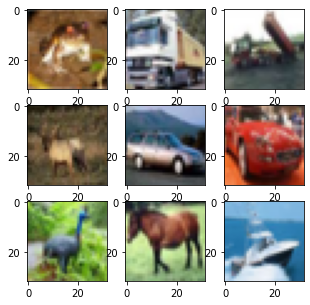

In [35]:
fig = plt.figure(figsize = (5, 5))
for i in range(9):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(xtrain[i])

plt.show()

In [37]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

print(model.output_shape)

(None, 10, 10, 10)


In [38]:
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

In [39]:
print(model.output_shape)

(None, 5, 5, 10)


In [40]:
model.add(Flatten())
print(model.output_shape)

(None, 250)


In [41]:
model = Sequential()

model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1)


Epoch 1/100
21/21 [==============================] - 0s 9ms/step - loss: 5.0971 - accuracy: 0.1075 - val_loss: 2.8157 - val_accuracy: 0.1349
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 2.2558 - accuracy: 0.1970 - val_loss: 1.8677 - val_accuracy: 0.3611
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 1.6673 - accuracy: 0.4318 - val_loss: 1.3771 - val_accuracy: 0.5079
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 1.2166 - accuracy: 0.6587 - val_loss: 0.9303 - val_accuracy: 0.7262
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.8789 - accuracy: 0.7831 - val_loss: 0.6523 - val_accuracy: 0.8571
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.8318 - val_loss: 0.4946 - val_accuracy: 0.8810
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.8617 - val_loss: 0.3816 - val_accuracy: 0.9167
Epoch 8/100
2

Epoch 59/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0469 - val_accuracy: 0.9841
Epoch 60/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0443 - val_accuracy: 0.9881
Epoch 61/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 0.9841
Epoch 62/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0440 - val_accuracy: 0.9881
Epoch 63/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0425 - val_accuracy: 0.9881
Epoch 64/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 0.9881
Epoch 65/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0404 - val_accuracy: 0.9881
Epoch 

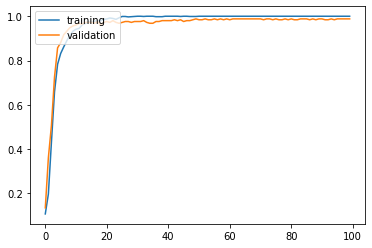

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [45]:
results = model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 883us/step - loss: 0.1023 - accuracy: 0.9778


In [ ]:
def basic_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

model = basic_cnn()
model.summary()

In [46]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [47]:
earlystop = EarlyStopping(patience=10)

In [48]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, # new lr = old lr * factor
                                            min_lr=0.00001)

In [49]:
callbacks = [earlystop,learning_rate_reduction]

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [ ]:
train_df['category'].value_counts().plot.bar()

validate_df['category'].value_counts().plot.bar()


In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "dogs-vs-cats/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)


In [ ]:
test_filenames = os.listdir("dogs-vs-cats/test1/test1/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "dogs-vs-cats/test1/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

test_df['category'] = np.argmax(predict, axis=-1)


label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

test_df['category'].value_counts().plot.bar()

